# Homework 14, Mapping Part 2

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
from shapely.geometry import Point
from shapely.geometry import Polygon

In [4]:
%matplotlib inline

## Import data - US states

In [7]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.shape

(56, 10)

In [8]:
states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


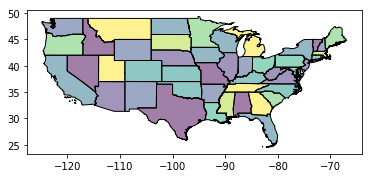

In [10]:
usa = states.to_crs({'init': 'epsg:4326'})
bounds = [
    [-128.144531,50.346395],
    [-63.105469,50.346395],
    [-63.105469,23.244037],
    [-128.144531,23.244037],
]
usa_bounds = Polygon(bounds)
usa = usa[usa.within(usa_bounds)]
usa.plot()

## Import data - powerplants

In [12]:
df = pd.read_csv('powerplants.csv')
df.shape

(7610, 28)

In [14]:
df.head(3)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056


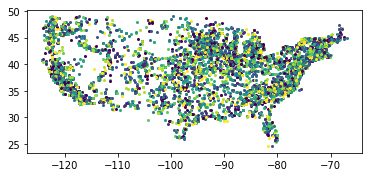

In [16]:
df['geometry'] = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(df, geometry='geometry')
powerplants.crs = {'init': 'epsg:4326'}
powerplants = powerplants[powerplants.within(USA_bounds)]
powerplants.plot()

## Import data - air quality

In [17]:
df = pd.read_csv('pm25_annual_fixed.csv')
df.shape

(441, 55)

In [18]:
df['geometry'] = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
pm25stations = gpd.GeoDataFrame(df, geometry='geometry')
pm25stations.crs = {'init': 'epsg:4326'}
pm25stations = pm25stations[pm25stations.within(USA_bounds)]

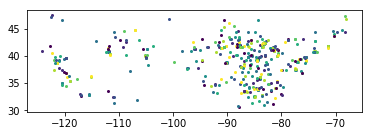

In [19]:
pm25stations.plot()

# Questions / Answers

1) Make a map of power plants in the US, color coded by type

In [20]:
powerplants.PrimSource.value_counts()

natural gas       1661
solar             1368
hydroelectric     1366
wind               921
biomass            734
petroleum          724
coal               375
other              109
geothermal          65
nuclear             62
pumped storage      34
Name: PrimSource, dtype: int64

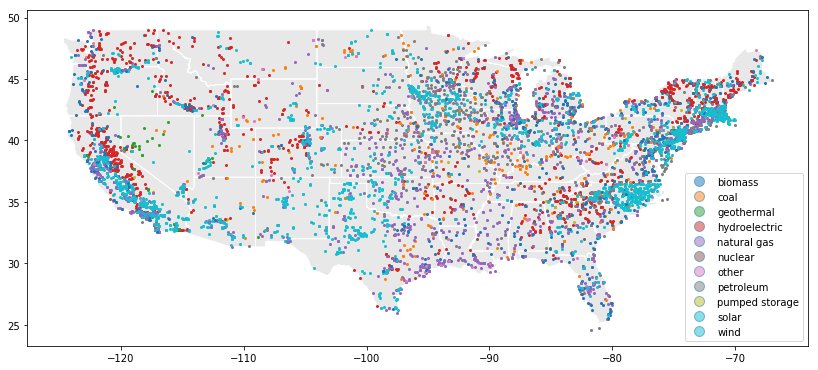

In [23]:
ax = states.plot(color='lightgrey', edgecolor='white', figsize=(14,14))
powerplants.plot(ax=ax, column='PrimSource', cmap='tab10', legend=True)

2) Make a map of air quality stations, color coded by average air quality

In [24]:
pd.set_option("display.max_columns", 100) 
pm25stations.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)


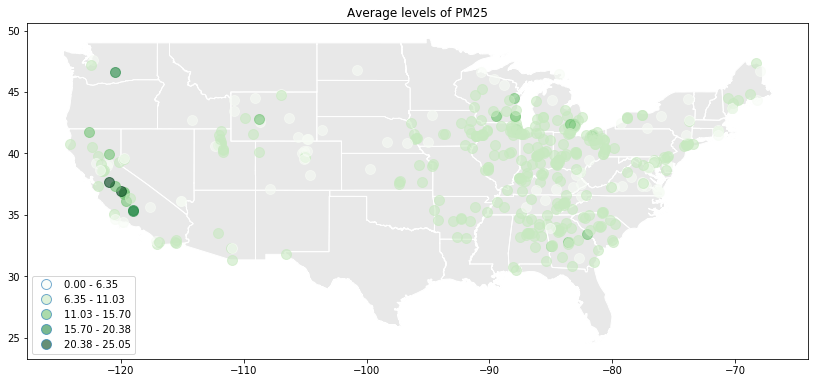

In [27]:
ax = states.plot(color='lightgray', edgecolor='white', figsize=(14,14))
ax = pm25stations.plot(ax=ax, column='Arithmetic Mean', cmap='Greens', scheme='equal_interval', markersize=10, alpha=0.6, legend=True)
ax.set_title("Average levels of PM25")

3) Make a map of air quality stations, color coded by worst air quality ever 

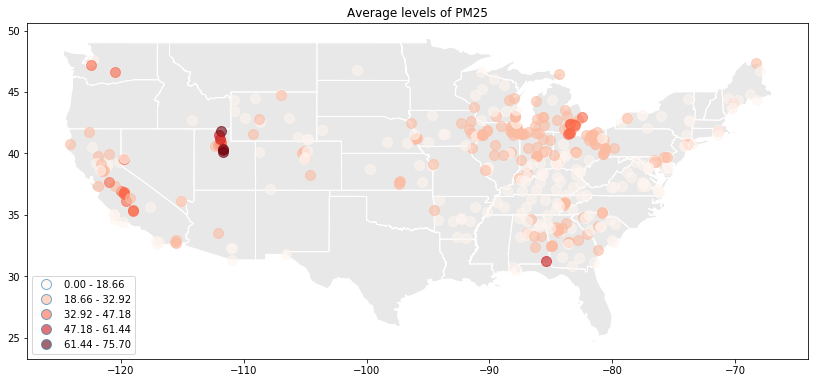

In [28]:
ax = states.plot(color='lightgray', edgecolor='white', figsize=(14,14))
ax = pm25stations.plot(ax=ax, column='1st Max Value', cmap='Reds', scheme='equal_interval', markersize=10, alpha=0.6, legend=True)
ax.set_title("Average levels of PM25")